### Understanding Logistic Regression

In [80]:
# Used to model binary variates
# To predict 0/1 behavior, we can use probabilities
# Given linear equation of the from y = b_0 + b_1*x
# Apply sigmoid function p = 1/(1 + e^(-y))
# We obtain ln(p/(1 - p)) = y = b_0 + b_1*x
# This provides us with a logistic plot

### Importing libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset

In [82]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [83]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Splitting dataset into training set and testing set

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [85]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [86]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [87]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [88]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


### Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
print(X_train)

[[ 0.58 -0.89]
 [-0.61  1.46]
 [-0.01 -0.57]
 [-0.61  1.9 ]
 [ 1.37 -1.41]
 [ 1.47  1.  ]
 [ 0.09 -0.8 ]
 [-0.01 -0.25]
 [-0.21 -0.57]
 [-0.21 -0.19]
 [-0.31 -1.29]
 [-0.31 -0.57]
 [ 0.38  0.1 ]
 [ 0.88 -0.6 ]
 [ 2.07 -1.18]
 [ 1.08 -0.13]
 [ 0.68  1.78]
 [-0.71  0.56]
 [ 0.78  0.36]
 [ 0.88 -0.54]
 [-1.2  -1.58]
 [ 2.17  0.94]
 [-0.01  1.23]
 [ 0.19  1.08]
 [ 0.38 -0.48]
 [-0.31 -0.31]
 [ 0.98 -0.83]
 [ 0.98  1.87]
 [-0.01  1.26]
 [-0.9   2.27]
 [-1.2  -1.58]
 [ 2.17 -0.8 ]
 [-1.4  -1.47]
 [ 0.38  2.3 ]
 [ 0.78  0.77]
 [-1.   -0.31]
 [ 0.09  0.77]
 [-1.    0.56]
 [ 0.28  0.07]
 [ 0.68 -1.26]
 [-0.51 -0.02]
 [-1.8   0.36]
 [-0.71  0.13]
 [ 0.38  0.3 ]
 [-0.31  0.07]
 [-0.51  2.3 ]
 [ 0.19  0.04]
 [ 1.27  2.22]
 [ 0.78  0.27]
 [-0.31  0.16]
 [-0.01 -0.54]
 [-0.21  0.16]
 [-0.11  0.24]
 [-0.01 -0.25]
 [ 2.17  1.11]
 [-1.8   0.36]
 [ 1.87  0.13]
 [ 0.38 -0.13]
 [-1.2   0.3 ]
 [ 0.78  1.37]
 [-0.31 -0.25]
 [-1.7  -0.05]
 [-1.   -0.74]
 [ 0.28  0.5 ]
 [-0.11 -1.06]
 [-1.1   0.59]
 [ 0.09 -0

In [91]:
print(X_test)

[[-0.8   0.5 ]
 [-0.01 -0.57]
 [-0.31  0.16]
 [-0.8   0.27]
 [-0.31 -0.57]
 [-1.1  -1.44]
 [-0.71 -1.58]
 [-0.21  2.16]
 [-1.99 -0.05]
 [ 0.88 -0.77]
 [-0.8  -0.6 ]
 [-1.   -0.42]
 [-0.11 -0.42]
 [ 0.09  0.22]
 [-1.8   0.48]
 [-0.61  1.37]
 [-0.11  0.22]
 [-1.89  0.45]
 [ 1.67  1.75]
 [-0.31 -1.38]
 [-0.31 -0.65]
 [ 0.88  2.16]
 [ 0.28 -0.54]
 [ 0.88  1.03]
 [-1.5  -1.21]
 [ 1.08  2.07]
 [-1.    0.5 ]
 [-0.9   0.3 ]
 [-0.11 -0.22]
 [-0.61  0.48]
 [-1.7   0.53]
 [-0.11  0.27]
 [ 1.87 -0.28]
 [-0.11 -0.48]
 [-1.4  -0.34]
 [-1.99 -0.51]
 [-1.6   0.33]
 [-0.41 -0.77]
 [-0.71 -1.03]
 [ 1.08 -0.97]
 [-1.1   0.53]
 [ 0.28 -0.51]
 [-1.1   0.42]
 [-0.31 -1.44]
 [ 0.48  1.23]
 [-1.1  -0.34]
 [-0.11  0.3 ]
 [ 1.37  0.59]
 [-1.2  -1.15]
 [ 1.08  0.48]
 [ 1.87  1.52]
 [-0.41 -1.29]
 [-0.31 -0.36]
 [-0.41  1.32]
 [ 2.07  0.53]
 [ 0.68 -1.09]
 [-0.9   0.39]
 [-1.2   0.3 ]
 [ 1.08 -1.21]
 [-1.5  -1.44]
 [-0.61 -1.5 ]
 [ 2.17 -0.8 ]
 [-1.89  0.19]
 [-0.21  0.85]
 [-1.89 -1.26]
 [ 2.17  0.39]
 [-1.4   0

### Training logistic regression model on the training set

In [92]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
# The parameter C helps prevent overfitting 
# (higher C is more regularization)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting a new result

In [93]:
# Suppose a new customer is aged 30 with
# an annual salary of $87000
# This is the first value in the testing set

# Note that X_test has already been scaled


classifier.predict([X_test[0, :]]) # Our classifier predicts 0
y_test[0] # The correct answer is 0

# Our model correctly predicts that this customer does
# not purchase the new car

0

### Predicting testing set results

In [94]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


### Generating the confusion matrix

In [95]:
# Will show us the number of correct predictions
# and the number of incorrect predictions

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(cm), print(acc_score)

# Interpreting the confusion matrix:
# 65 correct predictions in class 0, 24 correct predictions of class 1
# 3 incorrect predictions in class 0, 8 incorrect predictions of class 1
# Accuracy score tells us 89% of predictions were correct

[[65  3]
 [ 8 24]]
0.89


(None, None)

### Visualizing training set results

KeyboardInterrupt: 

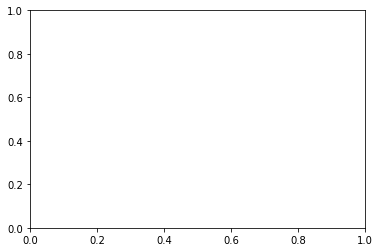

In [96]:
# This code is only useful for training purposes
# Most likely not used in real-world situations

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Customer Age')
plt.ylabel('Estimated Salary ($)')
plt.legend()
plt.show()

### Visualizing testing set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()